In [1]:
import numpy as np

In [19]:
net_name = "Conv_2_noflat"

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12741452942980518173
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3428777984
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9044237584332621117
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [6]:
mode = 2

data_directory = "../DATASET/mode_" + str(mode) + "/downsampling/"

X_train = np.load(data_directory + "X_train.npy")
y_train = np.load(data_directory + "y_train.npy")

X_val = np.load(data_directory + "X_val.npy")
y_val = np.load(data_directory + "y_val.npy")

X_test = np.load(data_directory + "X_test.npy")
y_test = np.load(data_directory + "y_test.npy")

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(10595, 250, 2)
(2659, 250, 2)
(4433, 250, 2)


In [12]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

seq_length = 250

model = Sequential()
model.add(Conv1D(64, 20, strides=2, activation='relu', input_shape=(seq_length, 2)))
model.add(BatchNormalization())

model.add(Conv1D(64, 20, strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(4))

model.add(Conv1D(128, 4, strides=2, activation='relu'))
model.add(BatchNormalization())

model.add(Conv1D(128, 4, strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(GlobalAveragePooling1D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_val, y_val), shuffle=True)

Train on 10595 samples, validate on 2659 samples
Epoch 1/25
10595/10595 [==============================] - 4s 393us/step - loss: 0.4341 - acc: 0.8366 - val_loss: 0.5713 - val_acc: 0.8597
Epoch 2/25
10595/10595 [==============================] - 2s 229us/step - loss: 0.3440 - acc: 0.8728 - val_loss: 0.3832 - val_acc: 0.8672
Epoch 3/25
10595/10595 [==============================] - 2s 233us/step - loss: 0.3168 - acc: 0.8847 - val_loss: 0.3614 - val_acc: 0.8710
Epoch 4/25
10595/10595 [==============================] - 2s 228us/step - loss: 0.3048 - acc: 0.8872 - val_loss: 0.3054 - val_acc: 0.8909
Epoch 5/25
10595/10595 [==============================] - 2s 233us/step - loss: 0.2974 - acc: 0.8899 - val_loss: 0.2813 - val_acc: 0.9041
Epoch 6/25
10595/10595 [==============================] - 2s 233us/step - loss: 0.2879 - acc: 0.8918 - val_loss: 0.2757 - val_acc: 0.9000
Epoch 7/25
10595/10595 [==============================] - 2s 232us/step - loss: 0.2878 - acc: 0.8931 - val_loss: 0.3668 - v

In [14]:
score = model.evaluate(X_val, y_val, verbose=1, batch_size=16)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

2659/2659 [==============================] - 0s 99us/step
Validation loss: 0.26997523843659277
Validation accuracy: 0.9112448288830387


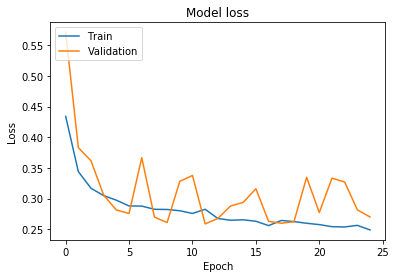

In [16]:
import matplotlib.pyplot as plt 

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
y_val_predict = (model.predict(X_val) > 0.5).astype(np.uint8)

from sklearn.metrics import recall_score, precision_score, fbeta_score

print(precision_score(y_val, y_val_predict))
print(recall_score(y_val, y_val_predict))
print(fbeta_score(y_val, y_val_predict, 2))

0.8844765342960289
0.5456570155902004
0.5909310178485286


In [20]:
model.save("Models/mode_" + str(mode) + "/" + net_name + ".h5")

In [68]:
from keras.utils import plot_model
plot_model(model, to_file=net_name+".png") 